In [141]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from pylab import *


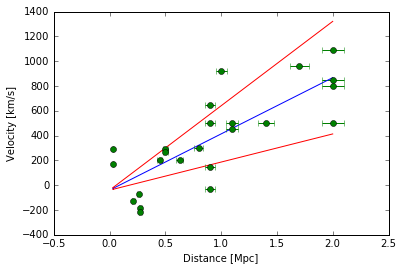

453.859994085 -40.4360087766
Hubble constant for hubble data 1: 453.859994085 + or - 226.929997042


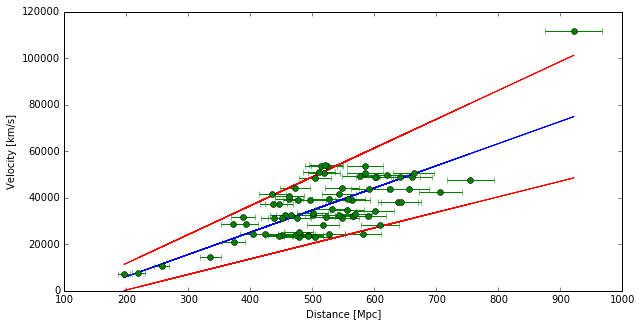

Hubble constant for hubble data 2: 95.3815270598 + or - 28.6144581179


In [185]:
%matplotlib inline
data='/Users/noahknoblauch/PHY154/hubble1.dat'
hubble1=np.loadtxt(data,usecols=(1,2,3,4,5,6))

data1='/Users/noahknoblauch/PHY154/hubble2.dat'
hubble2=np.loadtxt(data1)

hubble1_velocity=hubble1[:,2]
hubble2_velocity=hubble2[:,5]

hubble1_distance=hubble1[:,1]
hubble2_distance=hubble2[:,4]

(m,b)=polyfit(hubble1_distance,hubble1_velocity,1)

M=m*1.5
M1=m*.5

YP=polyval([M,b],hubble1_distance)
YP1=polyval([M1,b],hubble1_distance)
yp=polyval([m,b],hubble1_distance)
plt.plot(hubble1_distance,yp)
plt.plot(hubble1_distance,YP,color='red')
plt.plot(hubble1_distance,YP1,color='red')
plt.errorbar(hubble1_distance,hubble1_velocity,xerr=hubble1_distance*.05,fmt='o')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity [km/s]')
plt.xlim(-.5,2.5)
plt.show()

print m,b
print "Hubble constant for hubble data 1:", m,"+ or -",m*.5
(m1,b1)=polyfit(hubble2_distance,hubble2_velocity,1)




m2=m1*1.3
m3=m1*.7

yp2=polyval([m2,b1],hubble2_distance)
yp3=polyval([m3,b1],hubble2_distance)

yp1=polyval([m1,b1],hubble2_distance)
plt.figure(figsize=(10,5))
plt.plot(hubble2_distance,yp1)
plt.plot(hubble2_distance,yp2,color='red')
plt.plot(hubble2_distance,yp3,color='red')
plt.errorbar(hubble2_distance,hubble2_velocity,xerr=hubble2_distance*.05,fmt='o')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Velocity [km/s]')
plt.show()



print "Hubble constant for hubble data 2:", m1,"+ or -",m1*.3

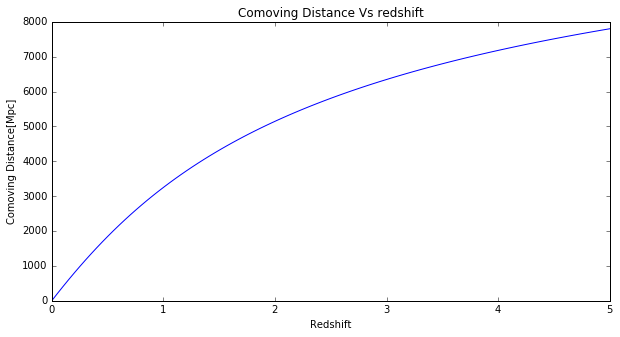

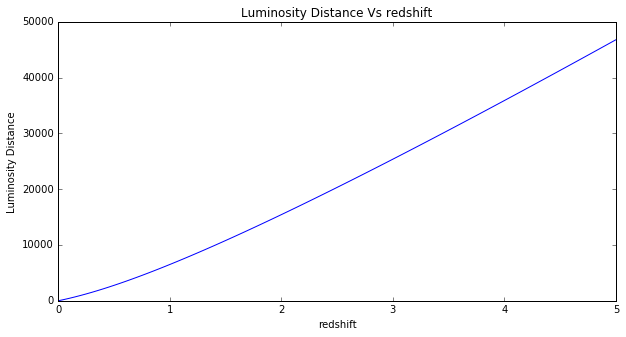

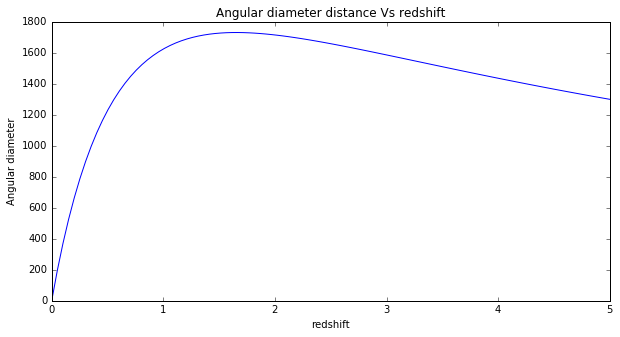

In [184]:
from scipy import integrate

c=3e5
omega_r=8.5e-5
omega_m=0.27
omega_lamda= 0.73
H0=72
Dh=c/H0
K=np.power((H0/c),2)*(omega_m+omega_lamda-1)

z=np.linspace(0,5,6)

def E(z):
    return np.power((1+z)**4*omega_r+((1+z)**3)*omega_m+omega_lamda,0.5)
def f(z):
    return Dh*(1/E(z))


function = lambda z: f(z)
integrate.quad(function,0,5)

D_c=[]
for i in range(100):
    answer=integrate.quad(function,0,5*(i+0.0)/100)
    #answer1=answer[0]
    D_c.append(answer[0])
    

y=np.linspace(0,5,100)


plt.figure(figsize=(10,5))
plt.plot(y,D_c)
plt.title('Comoving Distance Vs redshift')
plt.xlabel('Redshift')
plt.ylabel('Comoving Distance[Mpc]')
plt.show()

D_L=D_c*(1+y)
D_A=D_c/(1+y)

plt.figure(figsize=(10,5))
plt.plot(y,D_L)
plt.title('Luminosity Distance Vs redshift')
plt.xlabel('redshift')
plt.ylabel('Luminosity Distance')




plt.figure(figsize=(10,5))
plt.plot(y,D_A)
plt.title('Angular diameter distance Vs redshift')
plt.xlabel('redshift')
plt.ylabel('Angular diameter')
plt.show()

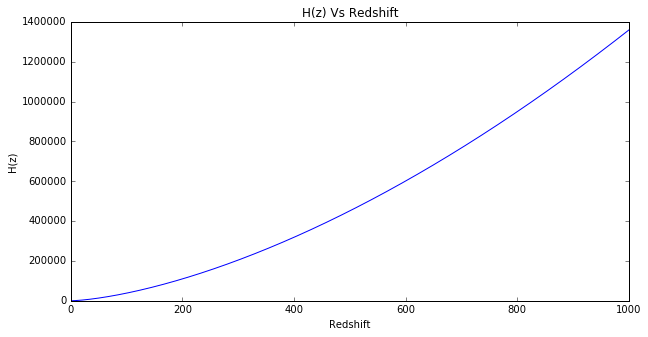

In [183]:
y1=np.linspace(0,1000,1000)

H_Z=H0*E(y1)

plt.figure(figsize=(10,5))
plt.plot(y1,H_Z)
plt.title('H(z) Vs Redshift')
plt.xlabel('Redshift')
plt.ylabel('H(z)')